# Enrollment Projections using Machine Learning

**Project**: School Enrollment Forecasting Project  
**Notebook Purpose**: Build and evaluate machine learning models to predict future school enrollments.  
**Data Source**: Cleaned and Analyzed Springfield R-XII School District Enrollment Data  
**Author**: Kim Leach  
**Date**: April 06, 2024 

---

This notebook presents the development and comparison of several machine learning models, including Linear Regression, Decision Trees, Random Forest, and Gradient Boosting, aiming to accurately forecast school enrollment.


In [1]:
# Basic data handling and operations
import numpy as np
import pandas as pd

# Visualization tools
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning - model selection, evaluation, preprocessing, etc.
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, classification_report, confusion_matrix, mean_absolute_error
from sklearn.pipeline import make_pipeline

# Machine learning algorithms
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.svm import SVC, SVR
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.neural_network import MLPClassifier, MLPRegressor

# ARIMA
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf

# Path to dataset
enrollment_path = '../data/enrollment_training_data.xlsx'

# Load the data into Pandas DataFrames
enrollment_data = pd.read_excel(enrollment_path)

# Drop the unnecessary columns before splitting the data
enrollment_data.drop(columns=['DISTRICT_NAME', 'SCHOOL_NAME'], inplace=True)

# Display the first few rows of the DataFrames to verify
enrollment_data.head(10)

,YEAR,COUNTY_DISTRICT_CODE,SCHOOL_CODE,GRADE,TOTAL_ENROLLMENT,COHORT_SURVIVAL_RATE,RESIDENT_ESTIMATE,ENROLLMENT_RESIDENT_PROPORTION
0,2010,39141,1050,6,41,1.000000,29567.0,0.001387
1,2010,39141,1050,7,43,1.048780,29567.0,0.001454
2,2010,39141,1050,8,40,1.025641,29567.0,0.001353
3,2010,39141,1050,9,472,1.145631,29567.0,0.015964
4,2010,39141,1050,10,356,0.887781,29567.0,0.012040
5,2010,39141,1050,11,380,1.241830,29567.0,0.012852
6,2010,39141,1050,12,295,1.003401,29567.0,0.009977
7,2010,39141,1050,0-8,124,1.024793,29567.0,0.004194
8,2010,39141,1050,9-12,1503,1.063694,29567.0,0.050834
9,2010,39141,1050,0-12,1627,1.060626,29567.0,0.055028


In [2]:
# Define the mapping for grade spans
grade_span_mapping = {'0-8': 13, '9-12': 14, '0-12': 15}

# Replace grade spans with the defined mapping
enrollment_data['GRADE'] = enrollment_data['GRADE'].replace(grade_span_mapping)

# Check the first few rows to ensure the replacement was successful
enrollment_data.head(25)

,YEAR,COUNTY_DISTRICT_CODE,SCHOOL_CODE,GRADE,TOTAL_ENROLLMENT,COHORT_SURVIVAL_RATE,RESIDENT_ESTIMATE,ENROLLMENT_RESIDENT_PROPORTION
0,2010,39141,1050,6,41,1.000000,29567.0,0.001387
1,2010,39141,1050,7,43,1.048780,29567.0,0.001454
2,2010,39141,1050,8,40,1.025641,29567.0,0.001353
3,2010,39141,1050,9,472,1.145631,29567.0,0.015964
4,2010,39141,1050,10,356,0.887781,29567.0,0.012040
5,2010,39141,1050,11,380,1.241830,29567.0,0.012852
6,2010,39141,1050,12,295,1.003401,29567.0,0.009977
7,2010,39141,1050,13,124,1.024793,29567.0,0.004194
8,2010,39141,1050,14,1503,1.063694,29567.0,0.050834
9,2010,39141,1050,15,1627,1.060626,29567.0,0.055028


In [3]:
# Replace NaN values with 0 in the Cohort_Survival_Rate column using recommended approach
enrollment_data['COHORT_SURVIVAL_RATE'] = enrollment_data['COHORT_SURVIVAL_RATE'].fillna(0)

# Check for NaN values in the entire DataFrame
nan_values = enrollment_data.isna().sum()
print("Number of NaN values in each column:")
print(nan_values)

# Check for blank values in the entire DataFrame
# Replace '' with whatever you consider a 'blank' value, such as ' ' for spaces.
blank_values = (enrollment_data == '').sum()
print("\nNumber of blank values in each column:")
print(blank_values)


Number of NaN values in each column:
YEAR                                0
COUNTY_DISTRICT_CODE                0
SCHOOL_CODE                         0
GRADE                               0
TOTAL_ENROLLMENT                    0
COHORT_SURVIVAL_RATE                0
RESIDENT_ESTIMATE                 352
ENROLLMENT_RESIDENT_PROPORTION    352
dtype: int64

Number of blank values in each column:
YEAR                              0
COUNTY_DISTRICT_CODE              0
SCHOOL_CODE                       0
GRADE                             0
TOTAL_ENROLLMENT                  0
COHORT_SURVIVAL_RATE              0
RESIDENT_ESTIMATE                 0
ENROLLMENT_RESIDENT_PROPORTION    0
dtype: int64


In [4]:
# Define the new cutoff year for splitting the data
cutoff_year = 2021

# Split the data based on the new cutoff year
train_data = enrollment_data[enrollment_data['YEAR'] <= cutoff_year]
test_data = enrollment_data[enrollment_data['YEAR'] == 2022]  # Use 2022 as the test set

# Separate features and target variable for training and testing
X_train = train_data.drop(['TOTAL_ENROLLMENT'], axis=1)
y_train = train_data['TOTAL_ENROLLMENT']
X_test = test_data.drop(['TOTAL_ENROLLMENT'], axis=1)
y_test = test_data['TOTAL_ENROLLMENT']


In [5]:
# Train the Linear Regression Model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predictions
lr_predictions = lr_model.predict(X_test)

# Metrics
lr_mse = mean_squared_error(y_test, lr_predictions)
lr_rmse = np.sqrt(lr_mse)
lr_mae = mean_absolute_error(y_test, lr_predictions)
lr_r2 = r2_score(y_test, lr_predictions)

# Adjusted R²
n = X_test.shape[0]  # number of observations
p = X_test.shape[1]  # number of predictors
lr_adjusted_r2 = 1 - (1 - lr_r2) * (n - 1) / (n - p - 1)

print("Linear Regression - MSE:", lr_mse)
print("Linear Regression - RMSE:", lr_rmse)
print("Linear Regression - MAE:", lr_mae)
print("Linear Regression - R²:", lr_r2)
print("Linear Regression - Adjusted R²:", lr_adjusted_r2)



Linear Regression - MSE: 649.6860342375368
Linear Regression - RMSE: 25.488939449053913
Linear Regression - MAE: 15.99076001432412
Linear Regression - R²: 0.9917495857853905
Linear Regression - Adjusted R²: 0.9915816994496282


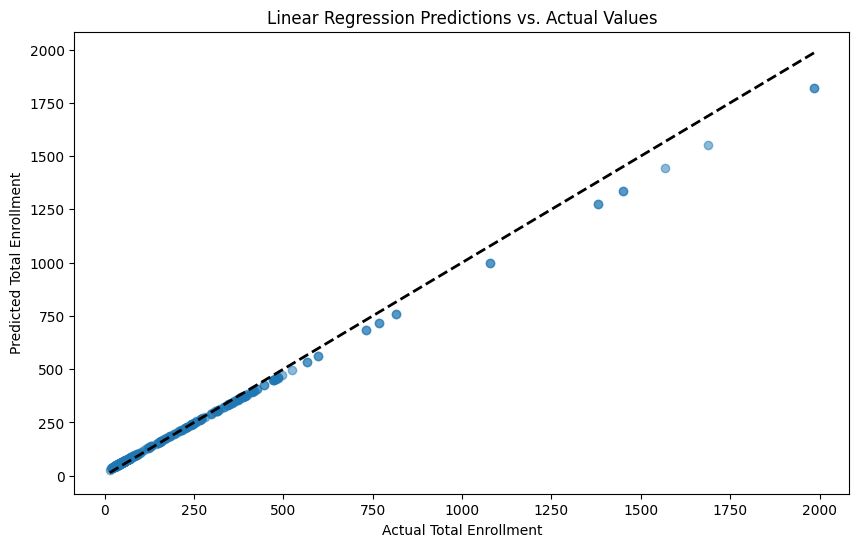

In [6]:
# Plot actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, lr_predictions, alpha=0.5)

plt.title('Linear Regression Predictions vs. Actual Values')
plt.xlabel('Actual Total Enrollment')
plt.ylabel('Predicted Total Enrollment')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Diagonal line for reference
plt.show()

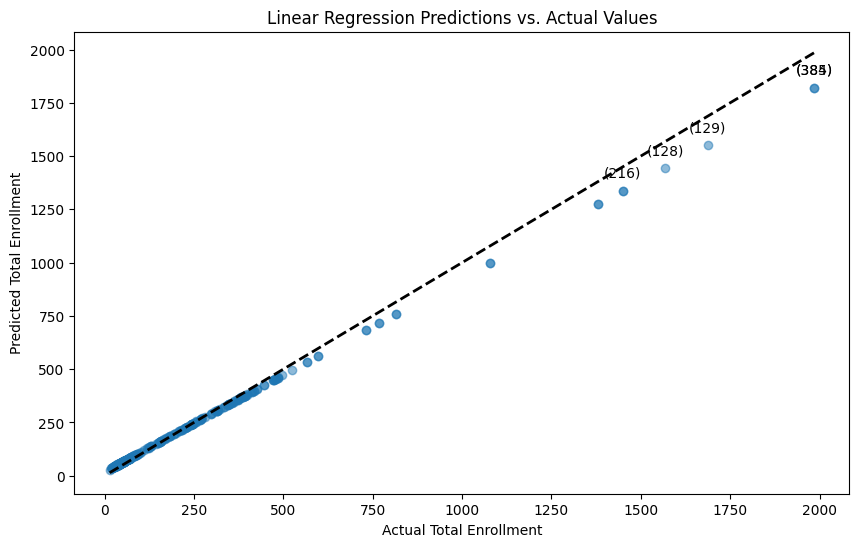

In [7]:
# Calculate residuals
residuals = y_test - lr_predictions

# Create a DataFrame from predictions and residuals
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': lr_predictions, 'Residuals': residuals})

# Sort the results by the absolute value of residuals
results_df = results_df.abs().sort_values(by='Residuals', ascending=False)

# Now let's re-plot with annotations for the points with the largest residuals
plt.figure(figsize=(10, 6))
plt.scatter(results_df['Actual'], results_df['Predicted'], alpha=0.5)

# Plotting the line of perfect predictions
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)

# Annotating significant outliers
for i in range(5):  # Just an example to annotate the top 5 points
    plt.annotate(f'({results_df.index[i]})', # This could be a school name or ID
                 (results_df.iloc[i]['Actual'], results_df.iloc[i]['Predicted']),
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center

plt.title('Linear Regression Predictions vs. Actual Values')
plt.xlabel('Actual Total Enrollment')
plt.ylabel('Predicted Total Enrollment')
plt.show()


In [8]:
# Train the Decision Tree Model
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)

# Predictions
dt_predictions = dt_model.predict(X_test)

# Metrics
dt_mse = mean_squared_error(y_test, dt_predictions)
dt_rmse = np.sqrt(dt_mse)
dt_mae = mean_absolute_error(y_test, dt_predictions)
dt_r2 = r2_score(y_test, dt_predictions)

# Adjusted R²
dt_adjusted_r2 = 1 - (1 - dt_r2) * (n - 1) / (n - p - 1)

print("Decision Tree - MSE:", dt_mse)
print("Decision Tree - RMSE:", dt_rmse)
print("Decision Tree - MAE:", dt_mae)
print("Decision Tree - R²:", dt_r2)
print("Decision Tree - Adjusted R²:", dt_adjusted_r2)


Decision Tree - MSE: 244.08522727272728
Decision Tree - RMSE: 15.623227172153879
Decision Tree - MAE: 6.636363636363637
Decision Tree - R²: 0.9969003424384357
Decision Tree - Adjusted R²: 0.9968372680113109


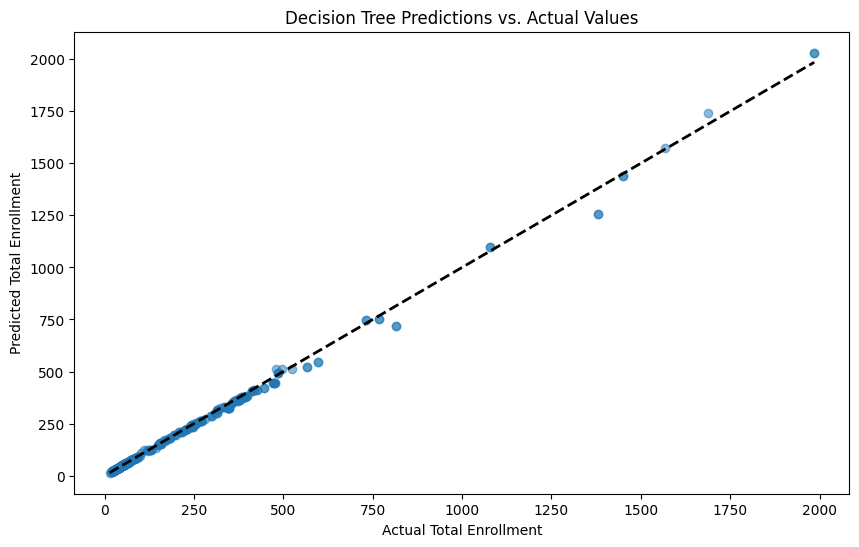

In [9]:
# Plot actual vs. predicted values for the Decision Tree model
plt.figure(figsize=(10, 6))
plt.scatter(y_test, dt_predictions, alpha=0.5)  # Replace dt_predictions with actual predictions

plt.title('Decision Tree Predictions vs. Actual Values')
plt.xlabel('Actual Total Enrollment')
plt.ylabel('Predicted Total Enrollment')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Diagonal line for reference
plt.show()


In [10]:
# Select the Machine Learning Algorithm for Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)  # n_estimators is the number of trees

# Train the Random Forest Model
rf_model.fit(X_train, y_train)

# Make Predictions
rf_predictions = rf_model.predict(X_test)

# Evaluate the Random Forest Model
rf_mse = mean_squared_error(y_test, rf_predictions)
rf_rmse = np.sqrt(rf_mse)
rf_mae = mean_absolute_error(y_test, rf_predictions)
rf_r2 = r2_score(y_test, rf_predictions)

# Number of observations and predictors for Adjusted R²
n = X_test.shape[0]  
p = X_test.shape[1]  

rf_adjusted_r2 = 1 - (1 - rf_r2) * (n - 1) / (n - p - 1)

print("Random Forest - MSE:", rf_mse)
print("Random Forest - RMSE:", rf_rmse)
print("Random Forest - MAE:", rf_mae)
print("Random Forest - R²:", rf_r2)
print("Random Forest - Adjusted R²:", rf_adjusted_r2)

Random Forest - MSE: 123.29300681818185
Random Forest - RMSE: 11.103738416325461
Random Forest - MAE: 5.489943181818181
Random Forest - R²: 0.9984342923775351
Random Forest - Adjusted R²: 0.9984024320480082


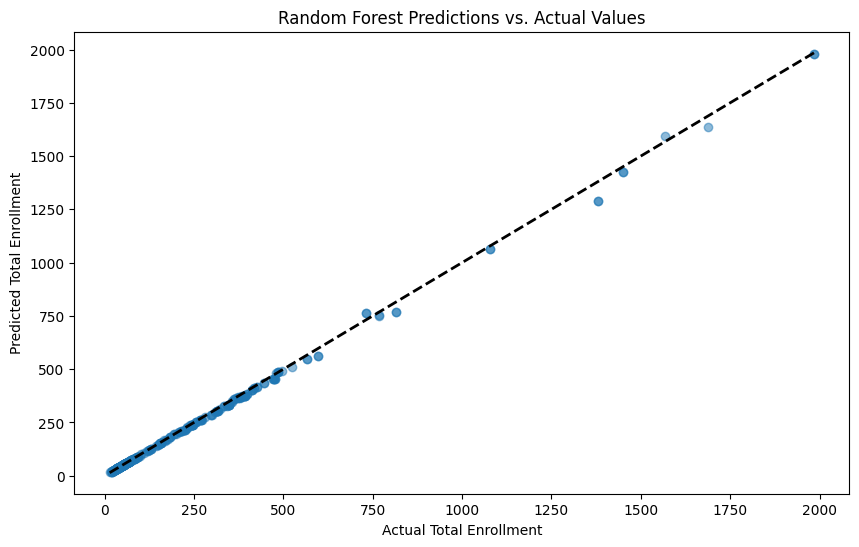

In [15]:
# Plot actual vs. predicted values for the Random Forest model
plt.figure(figsize=(10, 6))
plt.scatter(y_test, rf_predictions, alpha=0.5) 

plt.title('Random Forest Predictions vs. Actual Values')
plt.xlabel('Actual Total Enrollment')
plt.ylabel('Predicted Total Enrollment')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Diagonal line for reference
plt.show()


In [11]:
# Select the Machine Learning Algorithm for Gradient Boosting
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Train the Gradient Boosting Model
gb_model.fit(X_train, y_train)

# Make Predictions
gb_predictions = gb_model.predict(X_test)

# Evaluate the Gradient Boosting Model
gb_mse = mean_squared_error(y_test, gb_predictions)
gb_rmse = np.sqrt(gb_mse)
gb_mae = mean_absolute_error(y_test, gb_predictions)
gb_r2 = r2_score(y_test, gb_predictions)

# Number of observations and predictors for Adjusted R²
n = X_test.shape[0]  # number of observations
p = X_test.shape[1]  # number of predictors

gb_adjusted_r2 = 1 - (1 - gb_r2) * (n - 1) / (n - p - 1)

print("Gradient Boosting - MSE:", gb_mse)
print("Gradient Boosting - RMSE:", gb_rmse)
print("Gradient Boosting - MAE:", gb_mae)
print("Gradient Boosting - R²:", gb_r2)
print("Gradient Boosting - Adjusted R²:", gb_adjusted_r2)

Gradient Boosting - MSE: 118.17334611237423
Gradient Boosting - RMSE: 10.870756464587652
Gradient Boosting - MAE: 5.601516735323953
Gradient Boosting - R²: 0.9984993073528236
Gradient Boosting - Adjusted R²: 0.9984687700024449


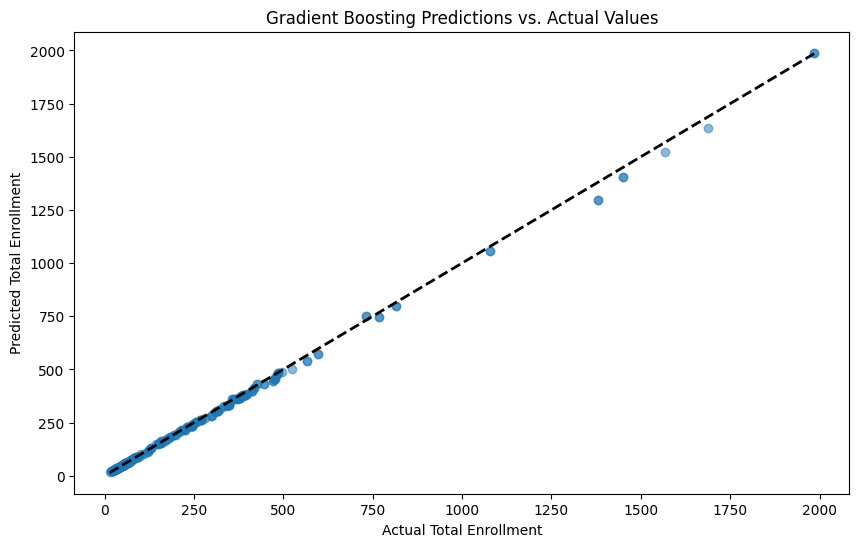

In [16]:
# Plot actual vs. predicted values for the Random Forest model
plt.figure(figsize=(10, 6))
plt.scatter(y_test, gb_predictions, alpha=0.5) 

plt.title('Gradient Boosting Predictions vs. Actual Values')
plt.xlabel('Actual Total Enrollment')
plt.ylabel('Predicted Total Enrollment')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Diagonal line for reference
plt.show()


In [12]:
# Select the Machine Learning Algorithm for MLP
mlp_model = MLPRegressor(hidden_layer_sizes=(50, 50),
                                  activation='relu',
                                  solver='adam',
                                  max_iter=1000,
                                  learning_rate_init=0.01,
                                  alpha=0.001,
                                  batch_size=100,
                                  random_state=42)


# Train the MLP Model
mlp_model.fit(X_train, y_train)

# Make Predictions
mlp_predictions = mlp_model.predict(X_test)

# Evaluate the MLP Model
mlp_mse = mean_squared_error(y_test, mlp_predictions)
mlp_rmse = np.sqrt(mlp_mse)
mlp_mae = mean_absolute_error(y_test, mlp_predictions)
mlp_r2 = r2_score(y_test, mlp_predictions)

# Number of observations and predictors for Adjusted R²
n = X_test.shape[0]  # number of observations
p = X_test.shape[1]  # number of predictors

mlp_adjusted_r2 = 1 - (1 - mlp_r2) * (n - 1) / (n - p - 1)

print("MLP - MSE:", mlp_mse)
print("MLP - RMSE:", mlp_rmse)
print("MLP - MAE:", mlp_mae)
print("MLP - R²:", mlp_r2)
print("MLP - Adjusted R²:", mlp_adjusted_r2)


MLP - MSE: 67656.74503493485
MLP - RMSE: 260.10910217624996
MLP - MAE: 216.04816205542093
MLP - R²: 0.14082165610112196
MLP - Adjusted R²: 0.12333837584736573


In [13]:
# Assuming dt_model, rf_model, and gb_model are your trained models
# And X_train, y_train, X_test, y_test are your data splits

dt_train_predictions = dt_model.predict(X_train)
dt_test_predictions = dt_model.predict(X_test)

rf_train_predictions = rf_model.predict(X_train)
rf_test_predictions = rf_model.predict(X_test)

gb_train_predictions = gb_model.predict(X_train)
gb_test_predictions = gb_model.predict(X_test)

# Calculate and compare R² or other metrics for training and test sets
dt_train_r2 = r2_score(y_train, dt_train_predictions)
dt_test_r2 = r2_score(y_test, dt_test_predictions)

rf_train_r2 = r2_score(y_train, rf_train_predictions)
rf_test_r2 = r2_score(y_test, rf_test_predictions)

gb_train_r2 = r2_score(y_train, gb_train_predictions)
gb_test_r2 = r2_score(y_test, gb_test_predictions)

# Print the results
print("Decision Tree - Train R²:", dt_train_r2, ", Test R²:", dt_test_r2)
print("Random Forest - Train R²:", rf_train_r2, ", Test R²:", rf_test_r2)
print("Gradient Boosting - Train R²:", gb_train_r2, ", Test R²:", gb_test_r2)


Decision Tree - Train R²: 1.0 , Test R²: 0.9969003424384357
Random Forest - Train R²: 0.9998986957747465 , Test R²: 0.9984342923775351
Gradient Boosting - Train R²: 0.9997586136052709 , Test R²: 0.9984993073528236


In [14]:
# Calculate additional metrics for training and test sets for each model
dt_train_mse = mean_squared_error(y_train, dt_train_predictions)
dt_train_rmse = np.sqrt(dt_train_mse)
dt_train_mae = mean_absolute_error(y_train, dt_train_predictions)

dt_test_mse = mean_squared_error(y_test, dt_test_predictions)
dt_test_rmse = np.sqrt(dt_test_mse)
dt_test_mae = mean_absolute_error(y_test, dt_test_predictions)

rf_train_mse = mean_squared_error(y_train, rf_train_predictions)
rf_train_rmse = np.sqrt(rf_train_mse)
rf_train_mae = mean_absolute_error(y_train, rf_train_predictions)

rf_test_mse = mean_squared_error(y_test, rf_test_predictions)
rf_test_rmse = np.sqrt(rf_test_mse)
rf_test_mae = mean_absolute_error(y_test, rf_test_predictions)

gb_train_mse = mean_squared_error(y_train, gb_train_predictions)
gb_train_rmse = np.sqrt(gb_train_mse)
gb_train_mae = mean_absolute_error(y_train, gb_train_predictions)

gb_test_mse = mean_squared_error(y_test, gb_test_predictions)
gb_test_rmse = np.sqrt(gb_test_mse)
gb_test_mae = mean_absolute_error(y_test, gb_test_predictions)

# Organize the data in a dictionary
results = {
    'Model': ['Decision Tree', 'Random Forest', 'Gradient Boosting'],
    'Train R²': [dt_train_r2, rf_train_r2, gb_train_r2],
    'Test R²': [dt_test_r2, rf_test_r2, gb_test_r2],
    'Train MSE': [dt_train_mse, rf_train_mse, gb_train_mse],
    'Test MSE': [dt_test_mse, rf_test_mse, gb_test_mse],
    'Train RMSE': [dt_train_rmse, rf_train_rmse, gb_train_rmse],
    'Test RMSE': [dt_test_rmse, rf_test_rmse, gb_test_rmse],
    'Train MAE': [dt_train_mae, rf_train_mae, gb_train_mae],
    'Test MAE': [dt_test_mae, rf_test_mae, gb_test_mae]
}

# Convert the dictionary to a pandas DataFrame
results_df = pd.DataFrame(results)

# Display the DataFrame
print(results_df)


               Model  Train R²   Test R²  Train MSE    Test MSE  Train RMSE  \
0      Decision Tree  1.000000  0.996900   0.000000  244.085227    0.000000   
1      Random Forest  0.999899  0.998434   7.518261  123.293007    2.741945   
2  Gradient Boosting  0.999759  0.998499  17.914414  118.173346    4.232542   

   Test RMSE  Train MAE  Test MAE  
0  15.623227   0.000000  6.636364  
1  11.103738   0.602351  5.489943  
2  10.870756   2.314034  5.601517  
